In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
%matplotlib inline

In [9]:
data_inicio = '2017-01-02'
data_fim = '2021-10-01'

In [10]:
df = data.DataReader('azul4.sa', 'yahoo', data_inicio, data_fim)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-11,22.980000,21.770000,21.809999,22.400000,13060500.0,22.400000
2017-04-12,22.990000,22.299999,22.450001,22.959999,1745900.0,22.959999
2017-04-13,23.010000,22.549999,22.969999,22.990000,549600.0,22.990000
2017-04-17,23.000000,22.620001,23.000000,22.850000,249300.0,22.850000
2017-04-18,24.790001,22.600000,22.820000,23.910000,1125100.0,23.910000
...,...,...,...,...,...,...
2021-09-27,39.029999,38.139999,38.490002,38.320000,3936700.0,38.320000
2021-09-28,38.389999,36.730000,37.900002,36.730000,3426300.0,36.730000
2021-09-29,37.750000,36.630001,37.209999,37.029999,3533300.0,37.029999


In [11]:
df['data_pregao'] = df.index

In [12]:
df_2021 = df[df['data_pregao'] >= '2021-01-01']
mme_rapida = df_2021.Close.ewm(span=12).mean()
mme_lenta = df_2021.Close.ewm(span=26).mean()

In [13]:
macd = mme_rapida - mme_lenta

In [14]:
sinal = macd.ewm(span=9).mean()

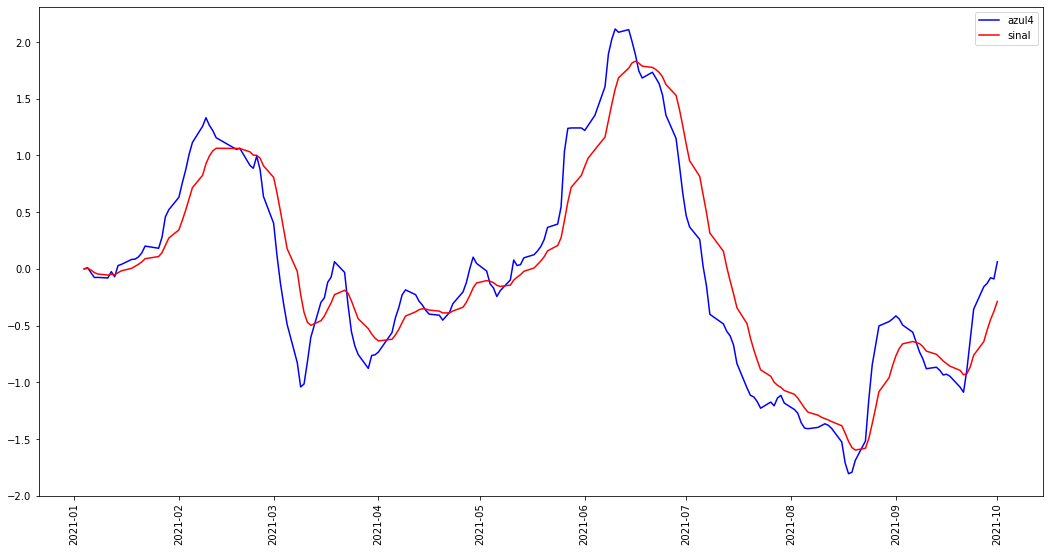

In [15]:
plt.figure(figsize=(18, 9))
plt.plot(df_2021.index, macd, label = 'azul4', color='blue')
plt.plot(df_2021.index, sinal, label = 'sinal', color='red')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()